
<a href="https://colab.research.google.com/github/kokchun/Databehandling-AI22/blob/main/Exercises/E00_pandas_basic_syntax.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

# pandas fundamentals exercises

---
These are introductory exercises in Pandas with focus in **syntax, DataFrame, indexing, data selection** and **data cleaning**.

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Cities in Sweden - create dataset (*)

Create this DataFrame from scratch: 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Malmö     |       347949 |
|  1 | Stockholm |       975551 |
|  2 | Uppsala   |       233839 |
|  3 | Göteborg  |       583056 |

&nbsp; a) Use your DataFrame to print out all the cities. (*)

&nbsp; b) Select only the row which contains Göteborg. Do this by using the name Göteborg. (*)

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the three largest cities. (*)

&nbsp; e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city. 


<details>

<summary>Answer</summary>

a) 

```
0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
```

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |
|  3 | Uppsala   |       233839 |


d)

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |

e)

|    | Kommun    |   Population |   Population (%) |
|---:|:----------|-------------:|-----------------:|
|  0 | Stockholm |       975551 |              9.4 |
|  1 | Göteborg  |       583056 |              5.6 |
|  2 | Malmö     |       347949 |              3.4 |
|  3 | Uppsala   |       233839 |              2.3 |

</details>


In [1]:
import pandas as pd
import numpy as np
from IPython.display import display         # to display multiple outputs in one cell

# 1.a)
print("Exercise 1.a)")

census = pd.DataFrame({
    "Kommun": np.array(("Malmö", "Stockholm", "Uppsala", "Göteborg", "Västerås", "Örebro", "Linköping", "Helsingborg", "Jönköping", "Norrköping")), 
    "Befolkning": np.array((347949, 975551, 233839, 583056, 151991, 158952, 158993, 149245, 137009, 137326))
})
census.index = census.index + 1         # start index from 1 instead of 0

# left-align the column values
census_left = census.style.set_properties(subset=["Kommun"], **{"text-align": "left"})

# left-align the column header
census_left = census_left.set_table_styles({
    "Kommun": [{"selector": "th", "props": [("text-align", "left")]}]
})
display(census_left)

# 1.b)
print("Exercise 1.b)")
display(census[census["Kommun"] == "Göteborg"])

# 1.c)
print("Exercise 1.c)")
census_ordered = census.sort_values(by = "Befolkning", ascending = False)
display(census_ordered)

# 1.d)
print("Exercise 1.d)")
display(census_ordered.head(3))

# 1.e)
print("Exercise 1.e)")
swe_pop = 10379295
census_ordered["Procent"] = [f"{x / swe_pop * 100:.2f}" for x in census_ordered["Befolkning"]]
display(census_ordered)

Exercise 1.a)


,Kommun,Befolkning
1,Malmö,347949
2,Stockholm,975551
3,Uppsala,233839
4,Göteborg,583056
5,Västerås,151991
6,Örebro,158952
7,Linköping,158993
8,Helsingborg,149245
9,Jönköping,137009
10,Norrköping,137326


Exercise 1.b)


,Kommun,Befolkning
4,Göteborg,583056


Exercise 1.c)


,Kommun,Befolkning
2,Stockholm,975551
4,Göteborg,583056
1,Malmö,347949
3,Uppsala,233839
7,Linköping,158993
6,Örebro,158952
5,Västerås,151991
8,Helsingborg,149245
10,Norrköping,137326
9,Jönköping,137009


Exercise 1.d)


,Kommun,Befolkning
2,Stockholm,975551
4,Göteborg,583056
1,Malmö,347949


Exercise 1.e)


,Kommun,Befolkning,Procent
2,Stockholm,975551,9.40
4,Göteborg,583056,5.62
1,Malmö,347949,3.35
3,Uppsala,233839,2.25
7,Linköping,158993,1.53
6,Örebro,158952,1.53
5,Västerås,151991,1.46
8,Helsingborg,149245,1.44
10,Norrköping,137326,1.32
9,Jönköping,137009,1.32


---

## 2. Cities in Sweden - real dataset (*)

Download the file komtopp50_2020.xlsx from the course github repo. The data is taken from SCB. 

&nbsp; a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

```python
df.head()
df.info()
df.describe()
```

Feel free to do more explorations. (*)

&nbsp; b) Clean your data so that the head looks like this: (*)


|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
|  0 |          83 |          84 | Ale      |            31868 |            31402 |     1.48398  |
|  1 |          64 |          64 | Alingsås |            41602 |            41420 |     0.439401 |
|  2 |         123 |         123 | Alvesta  |            20224 |            20134 |     0.447005 |
|  3 |         255 |         255 | Aneby    |             6821 |             6848 |    -0.394276 |
|  4 |         169 |         167 | Arboga   |            14039 |            14087 |    -0.34074  |

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the five smallest cities. (*)

&nbsp; e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. (*)

&nbsp; f) Plot a bar chart for the five largest cities and the five smallest cities. (*) 

<details>

<summary>Hint</summary>

a) Use
```python
pd.read_excel(path, header = ..., usecols="Letter1:LetterN", sheet_name="...")
```

</details>

<details>

<summary>Answer</summary>

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 


|    |   Rang 2020 |   Rang 2019 | Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:----------|-----------------:|-----------------:|-------------:|
|  0 |           1 |           1 | Stockholm |           975551 |           974073 |     0.151734 |
|  1 |           2 |           2 | Göteborg  |           583056 |           579281 |     0.65167  |
|  2 |           3 |           3 | Malmö     |           347949 |           344166 |     1.09918  |
|  3 |           4 |           4 | Uppsala   |           233839 |           230767 |     1.33121  |
|  4 |           5 |           5 | Linköping |           164616 |           163051 |     0.959822 |


d)

|     |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|----:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
| 289 |         290 |         290 | Bjurholm |             2387 |             2408 |    -0.872093 |
| 288 |         289 |         289 | Sorsele  |             2442 |             2489 |    -1.88831  |
| 287 |         288 |         288 | Dorotea  |             2498 |             2551 |    -2.07762  |
| 286 |         287 |         287 | Arjeplog |             2718 |             2785 |    -2.40575  |
| 285 |         286 |         286 | Åsele    |             2805 |             2794 |     0.393701 |

e)

```
Populationen i Sverige 2020: 10379295
Populationen i Sverige 2019: 10327589
```

f)

<img align="left" src="../assets/city_sizes.png" height="200"/>

</details>


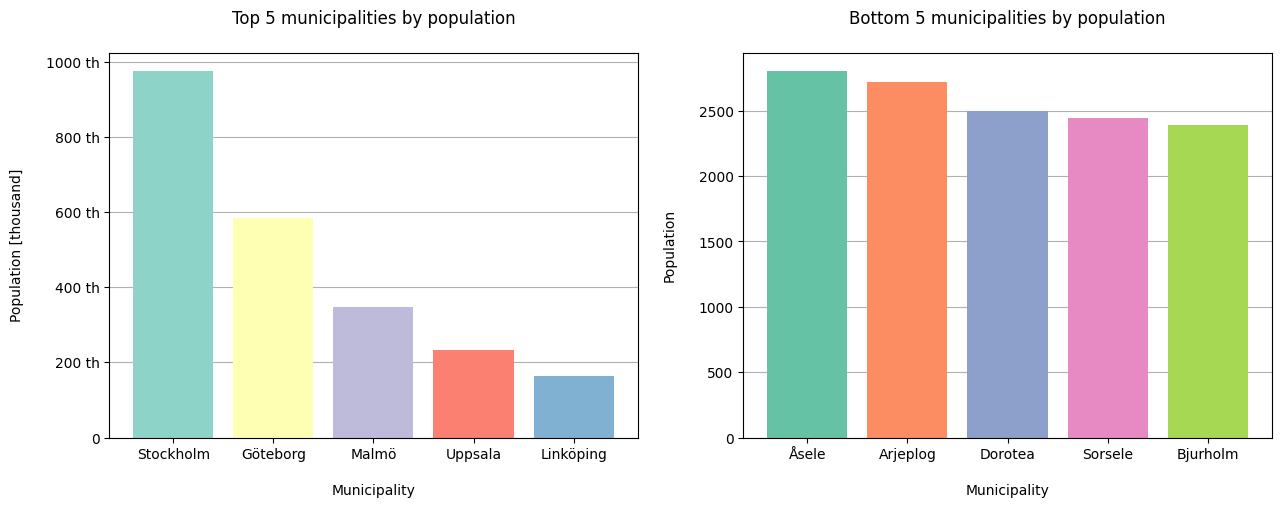

In [2]:
import pandas as pd
import os
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

path = os.path.join(os.getcwd(), "../Data/komtopp50_2020.xlsx")     # using OS library to dynamically read/write so that it works wherever the repo is located
tot_raw = pd.read_excel(path, sheet_name = "Totalt", header=None)                # read the sheet "Totalt" from the excel file with municipalities population data

# 2.b)
tot = tot_raw.dropna(how="all").iloc[4:, 0:]
tot.columns = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]
tot = tot.reset_index(drop=True)
tot.index = tot.index + 1
tot["Rang 2020"] = tot["Rang 2020"].astype(int)
tot["Rang 2019"] = tot["Rang 2019"].astype(int)
tot["Kommun"] = tot["Kommun"].astype(str).str.strip()
tot["Folkmängd 2020"] = tot["Folkmängd 2020"].astype(int)
tot["Folkmängd 2019"] = tot["Folkmängd 2019"].astype(int)
tot["Förändring"] = tot["Förändring"].astype(float)
# print("Exercise 2.b)"), display(tot.head(15))

# 2.c)
tot = tot.sort_values(by="Folkmängd 2020", ascending=False)
# print("Exercise 2.c)"), display(tot.head(15))

# 2.d)
tot_low5 = tot.iloc[-5:]
tot_top5 = tot.iloc[:5]
# print("Exercise 2.d)"), display(tot_low5.head(15))

# 2.e)
tot_pop20 = int(tot["Folkmängd 2020"].sum())
tot_pop19 = int(tot["Folkmängd 2019"].sum())
# print(f"Exercise 2.e)\n\nSweden's total population in ...\n...2020: {tot_pop20}\n...2019: {tot_pop19}\n")

# 2.f)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.bar(tot_top5["Kommun"], tot_top5["Folkmängd 2020"], color=plt.cm.Set3(np.arange(len(tot_top5))), zorder=2)
ax2.bar(tot_low5["Kommun"], tot_low5["Folkmängd 2020"], color=plt.cm.Set2(np.arange(len(tot_top5))), zorder=2)
ax1.set_title("Top 5 municipalities by population\n")
ax2.set_title("Bottom 5 municipalities by population\n")
ax1.set_ylabel("Population [thousand]\n")
ax2.set_ylabel("Population\n")
ax1.set_xlabel("\nMunicipality")
ax2.set_xlabel("\nMunicipality")
ax1.grid(axis="y", zorder=1)
ax2.grid(axis="y", zorder=1)
ax1.set_yticks(np.arange(0, 1200000, 200000))
ax1.set_yticklabels([f"{int(tick/1000)} th" if tick != 0 else "0" for tick in np.arange(0, 1200000, 200000)])
plt.show()


---

## 3. Cities in Sweden - gender (*)

We continue with the same Excel-file as in task 2, but now you should also read in the sheets "Kvinnor" and "Män" into two additional DataFrames. In this task, many operations are similar to all three datasets, try creating custom made functions to reuse as much code as possible.

&nbsp; a) Clean your data so that the head looks like this: (*)

Male: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 |          81 |          83 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 |          64 |          64 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|  2 |         122 |         123 | Alvesta  |            10367 |            10339 |     0.270819 | Man   |
|  3 |         255 |         255 | Aneby    |             3503 |             3498 |     0.142939 | Man   |
|  4 |         169 |         168 | Arboga   |             7094 |             7114 |    -0.281136 | Man   |

Female: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:-------|
|  0 |          84 |          85 | Ale      |            15612 |            15348 |     1.72009  | Kvinna |
|  1 |          64 |          64 | Alingsås |            20900 |            20774 |     0.606527 | Kvinna |
|  2 |         123 |         123 | Alvesta  |             9857 |             9795 |     0.632976 | Kvinna |
|  3 |         255 |         255 | Aneby    |             3318 |             3350 |    -0.955224 | Kvinna |
|  4 |         165 |         164 | Arboga   |             6945 |             6973 |    -0.401549 | Kvinna |


&nbsp; b) Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now.  (*)

|    | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|   ...  | ...       | ...  | ...   | ...  | ...    |
| 288 | Överkalix    |             1559 |             1578 |    -1.20406  | Kvinna |
| 289 | Övertorneå   |             2027 |             2065 |    -1.84019  | Kvinna |

&nbsp; c) Extract and change column name from the total DataFrame so that the head look like this: (*) 

|    | Kommun   |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|---:|:---------|-----------------:|-----------------:|-------------------:|
|  0 | Ale      |            31868 |            31402 |           1.48398  |
|  1 | Alingsås |            41602 |            41420 |           0.439401 |
|  2 | Alvesta  |            20224 |            20134 |           0.447005 |
|  3 | Aneby    |             6821 |             6848 |          -0.394276 |
|  4 | Arboga   |            14039 |            14087 |          -0.34074  |

&nbsp; d) Merge this data with the data in b) so that the head look like this: (*)

| Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|:----------|-----------------:|-----------------:|-------------:|:-------|-----------------:|-----------------:|-------------------:|
| Stockholm |           482982 |           482220 |     0.158019 | Man    |           975551 |           974073 |           0.151734 |
| Stockholm |           492569 |           491853 |     0.145572 | Kvinna |           975551 |           974073 |           0.151734 |
| Göteborg  |           292505 |           290308 |     0.756782 | Man    |           583056 |           579281 |           0.65167  |
| Göteborg  |           290551 |           288973 |     0.546072 | Kvinna |           583056 |           579281 |           0.65167  |
| Malmö     |           175411 |           173543 |     1.07639  | Kvinna |           347949 |           344166 |           1.09918  |

&nbsp; e) Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities. (*) 
 
&nbsp; f) Create a pie chart showing the total male and female population in Sweden 2020. (*)

&nbsp; g) Create a barplot showing the cities with the five largest percentual gender difference in 2020. (**)

&nbsp; h) Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020 (**)

&nbsp; i) Feel free to investigate other questions you are interested in using these datasets. (*), (**)

<br/>

<details>

<summary>Hint</summary>

f) You need to process the data first. For example

- compute difference between males and females in 2020
- use this difference to compute the differences in percentage
- sort the values by this percentage difference
- use seaborn barplot to plot, with the gender as hue

</details>

<br/>

<details>

<summary>Answer</summary>

e)

<img src="../assets/population_gender.png" height="200"/>

f)

<img src="../assets/population_genders_pie.png" height="200"/>

g)

<img src="../assets/cities_largest_gender_diff.png" height="200"/>

h)

<img src="../assets/pop_change.png" height="200"/>

</details>


In [3]:
# 3.a)
import pandas as pd
import os
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

path = os.path.join(os.getcwd(), "../Data/komtopp50_2020.xlsx")

def read(sheet):
    df_raw = pd.read_excel(path, sheet_name = sheet, header=None)
    return df_raw


def clean(df_raw):
    df = df_raw.dropna(how="all").iloc[4:, 0:]
    df.columns = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]
    df = df.reset_index(drop=True)
    df.index = df.index + 1
    df["Rang 2020"] = df["Rang 2020"].astype(int)
    df["Rang 2019"] = df["Rang 2019"].astype(int)
    df["Kommun"] = df["Kommun"].astype(str).str.strip()
    df["Folkmängd 2020"] = df["Folkmängd 2020"].astype(int)
    df["Folkmängd 2019"] = df["Folkmängd 2019"].astype(int)
    df["Förändring"] = df["Förändring"].replace(".", "0.0").astype(float)
    df["Förändring"] = df["Förändring"].astype(float)

    if df_raw.equals(fem_raw):
        df["Kön"] = ["Kvinna"] * len(df)
    else:
        df["Kön"] = ["Man"] * len(df)

    return df


fem_raw = read("Kvinnor")
man_raw = read("Män")
fem = clean(fem_raw)
man = clean(man_raw)
# print("Exercise 3.a)")
# display(fem.head(15))

# 3.b)
def drop_rang(df):
    df = df.drop(["Rang 2020", "Rang 2019"], axis=1)
    return df


sex = pd.concat([fem, man], axis=0).reset_index(drop=True)
sex = drop_rang(sex)
sex = sex.set_index("Kommun")
# print("Exercise 3.b)")
# display(sex.head(15))

# 3.c)
tot_raw = read("Totalt")
tot = clean(tot_raw)
tot = tot.drop("Kön", axis=1)
tot = drop_rang(tot)
tot = tot.set_index("Kommun")
tot = tot.rename(columns={"Folkmängd 2020": "Total Pop 2020", 
                          "Folkmängd 2019": "Total Pop 2019", 
                          "Förändring": "Total Förändring"})
# print("Exercise 3.c)")
# display(tot.head(15))

# 3.d)
swe = sex.merge(tot, on="Kommun")
swe = swe.sort_values(by=["Total Pop 2020", "Folkmängd 2020"], ascending=[False, False])
# print("Exercise 3.d)")
# display(swe.head(15))

# 3.e)
def E00_3_e(df):
    pal = {"Kvinna": "mediumseagreen", "Man": "orange"}
    plt.figure(figsize=(14, 8)) # depending on the size, perhaps other sizes can be set proportionally and dynamically?
    ax = sns.barplot(data=df, x="Folkmängd 2020", y="Kommun", hue="Kön", palette=pal, zorder=2)
    plt.title("Population by Gender and Municipality\n", fontsize=18, fontweight="bold")
    plt.ylabel("Municipality\n", fontsize=12, fontweight="bold")
    plt.xlabel("\nPopulation 2020", fontsize=12, fontweight="bold")
    plt.legend(title="Gender")
    plt.grid(axis='x', zorder=1)
    for container in ax.containers:
        ax.bar_label(container, fmt="%.0f", label_type="edge", padding=-60, color="white", fontsize=12, fontweight="bold")
    plt.show()


swe_top10 = swe.iloc[:20]
swe_low10 = swe.iloc[-20:]
# E00_3_e(swe_top10)
# E00_3_e(swe_low10)

# 3.f)
def E00_3_f():
    plt.pie(vls, labels=["Kvinnor","Män"], colors=pal, autopct='%.2f %%', startangle=90)
    plt.title("Gender Distribution in Sweden, 2020\n", fontsize=15, fontweight="bold")
    plt.show()


pop20 = swe["Folkmängd 2020"].sum()
pop_sex = swe.groupby("Kön")["Folkmängd 2020"].sum()
gender_percentage = (pop_sex / pop20 * 100).round(5)
pal = sns.color_palette("Set2")
lbl = gender_percentage.index
vls = gender_percentage.values
# E00_3_f()

# 3.g)
# barplot, five largest differences between genders, 2020
def E00_3_g(df):
    pal = {"Kvinna": "mediumseagreen", "Man": "orange"}
    sns.barplot(data=df, y="Folkmängd 2020", x="Kommun", hue="Kön", palette=pal, zorder=2)
    plt.title("Kommuner med största procentuella könsskillnad\n", fontweight="bold")
    plt.ylabel("Folkmängd 2020\n", fontweight="bold")
    plt.xlabel("\nKommun", fontweight="bold")
    plt.grid(axis="y", zorder=1)
    plt.show()


dif = swe[["Folkmängd 2020", "Kön", "Total Pop 2020"]].sort_values(by=["Total Pop 2020", "Folkmängd 2020"], ascending=[False, False])
dif_piv = dif.pivot_table(index="Kommun", columns="Kön", values="Folkmängd 2020")
dif_piv["Könsskillnad"] = [(abs(np.divide((k - m), (k + m))) * 100) for k, m in zip(dif_piv["Kvinna"], dif_piv["Man"])]
dif = dif.merge(dif_piv["Könsskillnad"], left_on="Kommun", right_index=True, how="left")
dif_top5 = dif.sort_values(by="Könsskillnad", ascending=False).iloc[:10]
# E00_3_g(dif_top5)

# 3.h)
# Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020
def E00_3_h(df):
    sns.barplot(data=df, x="Kommun", y="Total Förändring", hue="Kommun", zorder=2)
    plt.title("Kommuner med största procentuella könsskillnad\n", fontweight="bold")
    plt.ylabel("Total Förändring [%]\n", fontweight="bold")
    plt.xlabel("\nKommun", fontweight="bold")
    plt.grid(axis="y", zorder=1)
    plt.show()


pop_gro_top5 = swe.sort_values(by="Total Förändring", ascending=False).iloc[:10]
# E00_3_h(pop_gro_top5)

## Testing groupby()

In [14]:
display(swe.head(10))
test = swe.groupby("Kön")["Folkmängd 2020"]
test = swe.groupby(["Kön", "Folkmängd 2020"]).sum()
display(test)

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total Förändring
Kommun,,,,,,,
Stockholm,492569,491853,0.145572,Kvinna,975551,974073,0.151734
Stockholm,482982,482220,0.158019,Man,975551,974073,0.151734
Göteborg,292505,290308,0.756782,Man,583056,579281,0.651670
Göteborg,290551,288973,0.546072,Kvinna,583056,579281,0.651670
Malmö,175411,173543,1.076390,Kvinna,347949,344166,1.099179
Malmö,172538,170623,1.122357,Man,347949,344166,1.099179
Uppsala,118147,116434,1.471220,Kvinna,233839,230767,1.331213
Uppsala,115692,114333,1.188633,Man,233839,230767,1.331213
Linköping,84055,83183,1.048291,Man,164616,163051,0.959822


Folkmängd 2019  Förändring  Total Pop 2020  \
Kön    Folkmängd 2020                                               
Kvinna 1154                      1159   -0.431406            2387   
       1157                      1170   -1.111111            2442   
       1171                      1195   -2.008368            2498   
       1292                      1327   -2.637528            2718   
       1336                      1338   -0.149477            2805   
...                               ...         ...             ...   
Man    84055                    83183    1.048291          164616   
       115692                  114333    1.188633          233839   
       172538                  170623    1.122357          347949   
       292505                  290308    0.756782          583056   
       482982                  482220    0.158019          975551   

                       Total Pop 2019  Total Förändring  
Kön    Folkmängd 2020                                    
Kvinna 1154                      2408         -0.872093  
       1157                      2489         -1.888309  
       1171                      2551         -2.077617  
       1292                      2785         -2.405745  
       1336                      2794          0.393701  
...                               ...               ...  
Man    84055                   163051          0.959822  
       115692                  230767          1.331213  
       172538                  344166          1.099179  
       292505                  579281          0.651670  
       482982                  974073          0.151734  

[576 rows x 5 columns]

In [15]:
import streamlit as slit

slit.write("""
First test
""")

2024-10-25 10:22:05.645 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 10:22:05.730 
  command:

    streamlit run /home/albot/coding/repos/databehandling-albot/.venv/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-10-25 10:22:05.733 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 10:22:05.735 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 10:22:05.736 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---